In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

class Perceptron(object):
	'''Perceptron classifier'''
	'''Parameters'''
	# Learning_rate : 0.0 ~ 1.0
	# n_iter : passes over the training dataset

	'''Attributes'''
	# weight_arr : 1d-array , weight after fitting
	# errors_ : list, number of misclassification in each epoch
	def __init__(self,Learning_rate=0.01,n_iter=10):
		self.Learning_rate = Learning_rate
		self.n_iter = n_iter

	def fit(self,X,y):
		'''Parameters'''
		# X:{array-like}, shape = [n_samples, n_features]
		# Training vectors, where n_samples
		# is the number of samples and n_features is the number of features.
		# y : array-like, shape = [n_samples]
		# Target values.

		self.weight_arr = np.zeros(1+X.shape[1]) # init all zero weights + bias
		self.errors_ = []

		for x in range(self.n_iter):
			errors = 0
			for xi,target in zip(X,y):
				update = self.Learning_rate * (target - self.predict(xi))
				self.weight_arr[1:] += update * xi
				self.weight_arr[0] += update
				errors += int(update!=0.0)
			self.errors_.append(errors)

		return self

	def predict(self,X):
		# return class label after unit step
		# numpy.where(condition[, x, y]),
		# Return elements, either from x or y, depending on condition
		# out : ndarray or tuple of ndarrays
		return np.where(self.net_input(X) >= 0.0,1,-1)

	def net_input(self,X):
		# calculate W.T * x + w[0](bias)	
		return np.dot(X,self.weight_arr[1:]) + self.weight_arr[0]



In [19]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


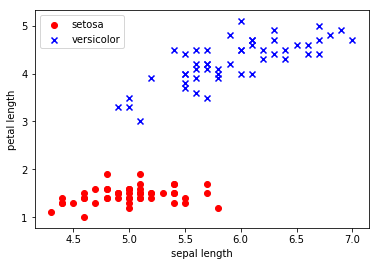

In [20]:
y = df.iloc[0:100,4].values
y = np.where(y=="Iris-setosa",-1,1) # numerical label
X = df.iloc[0:100, [0,2]].values # get column sepal length and petal length
X
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')

plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend(loc="upper left")

plt.show()

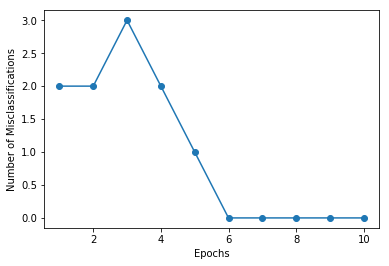

In [32]:
ppap = Perceptron(Learning_rate=0.1,n_iter=10)
ppap.fit(X,y)
plt.plot(range(1,len(ppap.errors_) +1),ppap.errors_,marker='o')
plt.xlabel("Epochs")
plt.ylabel("Number of Misclassifications")
plt.show()
# ppap.errors_
# range(1,len(ppap.errors_)+1) x軸 個數 1,2,3...